In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
price = [100, 105, 110, 120, 125, 100, 90, 85, 145, 150]

window = 5
sma = pd.Series(price).rolling(window=window).mean()
ema = pd.Series(price).ewm(span=window, adjust=False).mean()

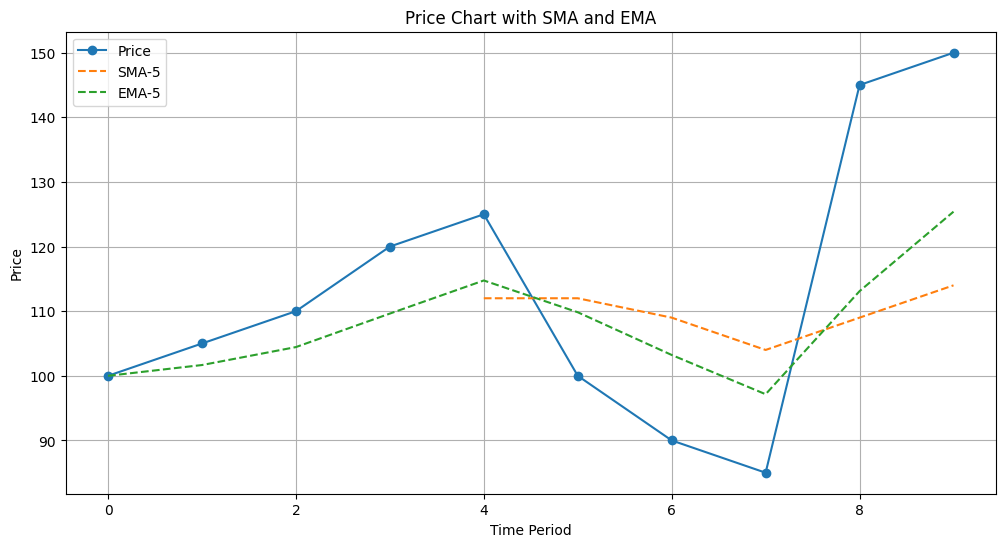

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(price, label='Price', marker='o')
plt.plot(sma, label=f'SMA-{window}', linestyle='--')
plt.plot(ema, label=f'EMA-{window}', linestyle='--')

plt.title('Price Chart with SMA and EMA')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
import yfinance as yf
data = yf.download(tickers='SPALI.BK', period='max', interval='1d')

# data.reset_index(inplace=True)
data.columns = data.columns.droplevel(1)
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2000-01-04,0.390011,0.402728,0.390011,0.394250,737730
2000-01-05,0.360336,0.381532,0.360336,0.381532,386190
2000-01-06,0.339140,0.347618,0.339140,0.347618,532980
2000-01-07,0.330661,0.356097,0.330661,0.356097,362880
2000-01-10,0.330661,0.343379,0.330661,0.339140,1483650
...,...,...,...,...,...
2025-03-26,17.200001,17.299999,17.000000,17.000000,3434600
2025-03-27,17.200001,17.299999,17.100000,17.200001,2476600
2025-03-28,17.000000,17.200001,17.000000,17.200001,1055200


In [21]:
import pandas_ta as ta
data.ta.adx(high='High', low='Low', close='Close', length=14, append=True)

,ADX_14,DMP_14,DMN_14
Date,,,
2000-01-04,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN
...,...,...,...
2025-03-26,24.228690,26.303611,11.924068
2025-03-27,25.184893,25.479948,11.550681
2025-03-28,25.644707,24.648724,12.805000


In [22]:
data

Price,Close,High,Low,Open,Volume,ADX_14,DMP_14,DMN_14
Date,,,,,,,,
2000-01-04,0.390011,0.402728,0.390011,0.394250,737730,NaN,NaN,NaN
2000-01-05,0.360336,0.381532,0.360336,0.381532,386190,NaN,NaN,NaN
2000-01-06,0.339140,0.347618,0.339140,0.347618,532980,NaN,NaN,NaN
2000-01-07,0.330661,0.356097,0.330661,0.356097,362880,NaN,NaN,NaN
2000-01-10,0.330661,0.343379,0.330661,0.339140,1483650,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-03-26,17.200001,17.299999,17.000000,17.000000,3434600,24.228690,26.303611,11.924068
2025-03-27,17.200001,17.299999,17.100000,17.200001,2476600,25.184893,25.479948,11.550681
2025-03-28,17.000000,17.200001,17.000000,17.200001,1055200,25.644707,24.648724,12.805000


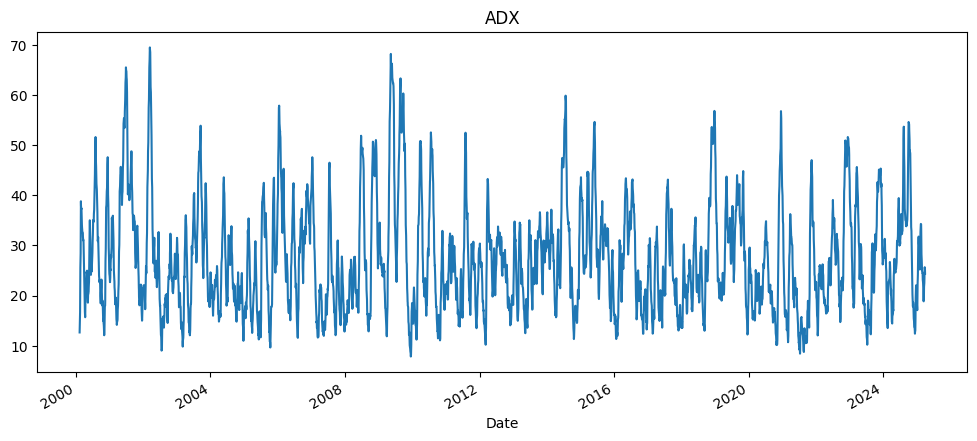

In [23]:
plt.figure(figsize=(12,5))
plt.title('ADX')
data['ADX_14'].plot()
plt.show()

In [28]:
import plotly.graph_objects as go 

dfpl = data[:500]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                                    open=dfpl['Open'],
                                    high=dfpl['High'],
                                    low=dfpl['Low'],
                                    close=dfpl['Close'],
                                    name='OHLC'),
                      go.Scatter(x=dfpl.index, y=dfpl['ADX_14'], name='ADX', yaxis='y2')
                                   ])

fig.update_layout(title='OHLC with ADX(14)',
                  yaxis=dict(domain=[0.2, 1]),
                  yaxis2=dict(domain=[0, 0.2],
                              anchor='free',
                              overlaying='y',
                              side='right',
                              title='ADX'))
fig.show()